   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  

Missing values before replacement:
 Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

Missing values after replacement:
 Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Pedigree        

C:\Users\sujal\AppData\Local\Temp\ipykernel_9524\1101587499.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace(0, np.nan, inplace=True)
C:\Users\sujal\AppData\Local\Temp\ipykernel_9524\1101587499.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

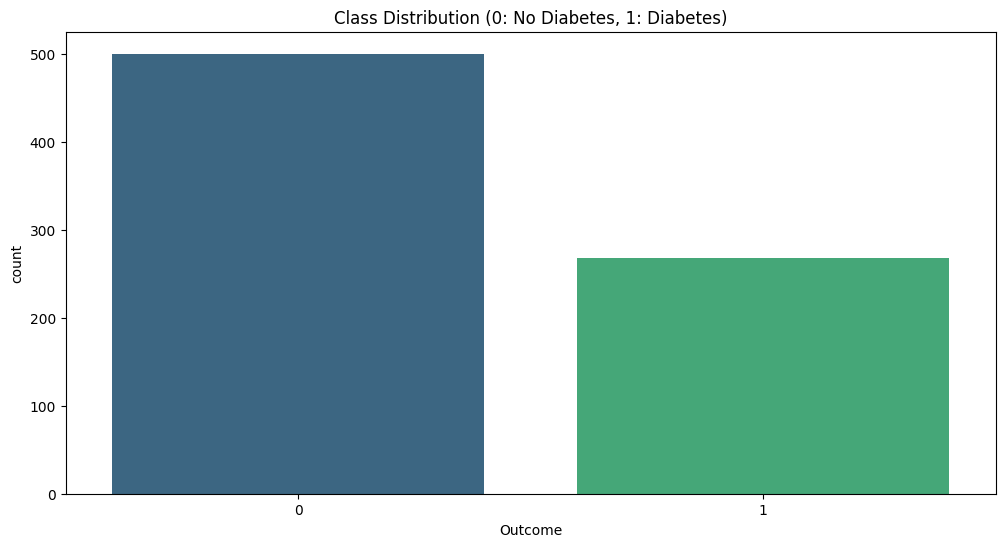

Best K = 5, Test Accuracy = 75.32%

Confusion Matrix:
 [[83 17]
 [21 33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

Accuracy: 0.7532, Precision: 0.6600, Recall: 0.6111, F1: 0.6346


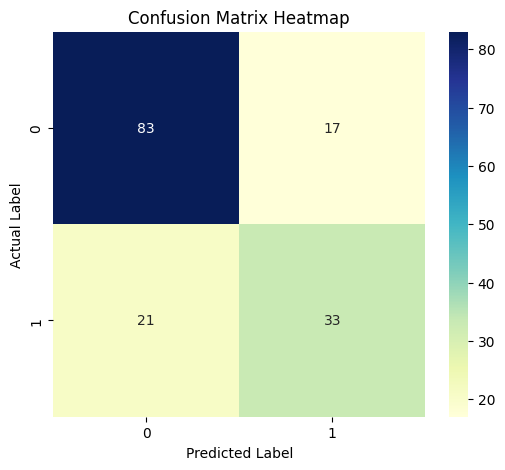

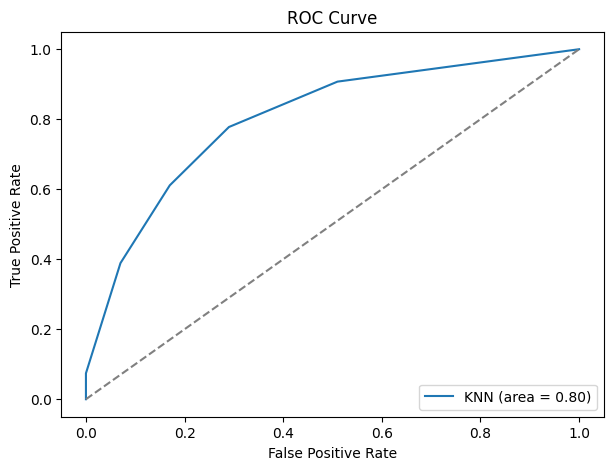


Best Parameters: {'n_neighbors': 25}
Best CV Score: 0.7721840251252015


In [2]:
# ```python
# ----------------------------------
# Practical 4: Diabetes Prediction using KNN
# ----------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, classification_report, roc_auc_score, roc_curve
)

# -----------------------------
# Load dataset
# -----------------------------
data = pd.read_csv("diabetes.csv")
print(data.head())

# Check missing values
print("\nMissing values before replacement:\n", data.isnull().sum())

# -----------------------------
# Replace 0 with NaN in specific columns
# -----------------------------
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_replace:
    data[col].replace(0, np.nan, inplace=True)

print("\nMissing values after replacement:\n", data.isnull().sum())

# Fill NaN with mean/median
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].median(), inplace=True)
data['BMI'].fillna(data['BMI'].median(), inplace=True)

print("\nMissing values after imputation:\n", data.isnull().sum())

# -----------------------------
# Visualization
# -----------------------------
plt.figure(figsize=(12, 6))
sns.countplot(x='Outcome', data=data, palette="viridis")
plt.title("Class Distribution (0: No Diabetes, 1: Diabetes)")
plt.show()

# -----------------------------
# Feature Scaling
# -----------------------------
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data.drop("Outcome", axis=1)),
                 columns=data.columns[:-1])
y = data["Outcome"]

# -----------------------------
# Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# KNN Model Training
# -----------------------------
train_scores, test_scores = [], []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

best_k = np.argmax(test_scores) + 1
print(f"Best K = {best_k}, Test Accuracy = {max(test_scores) * 100:.2f}%")

# Train final model with best K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# -----------------------------
# Evaluation Metrics
# -----------------------------
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

# -----------------------------
# Confusion Matrix Heatmap
# -----------------------------
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu", fmt="g")
plt.title("Confusion Matrix Heatmap")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

# -----------------------------
# ROC Curve
# -----------------------------
y_pred_proba = knn.predict_proba(X_test)[:, -1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"KNN (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# -----------------------------
# Hyperparameter Tuning (GridSearchCV)
# -----------------------------
param_grid = {"n_neighbors": np.arange(1, 30)}
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_cv.fit(X, y)

print("\nBest Parameters:", knn_cv.best_params_)
print("Best CV Score:", knn_cv.best_score_)
# ```
